In [1]:
# Setup chunk to install and load required packages
knitr::opts_chunk$set(warning = FALSE, message = FALSE)
suppressWarnings(if(!require("pacman")) install.packages("pacman"))

pacman::p_load('tidyverse', 'tidymodels', 'glmnet',
               'randomForest', 'xgboost','patchwork',
               'paletteer', 'here', 'doParallel', 'summarytools', 'statip')


Loading required package: pacman



In [2]:
# Initialize library
library(tidyverse)
library(patchwork)
library(statip)
library(glue)
library(summarytools)
library(tidymodels)
library(lubridate)
library(paletteer)
library(ggplot2)
library(dplyr)
library(rsample)
#library(statsr)
#library(GGally)
library(ggpubr)


Attaching package: 'lubridate'


The following objects are masked from 'package:base':

    date, intersect, setdiff, union




In [36]:
## Read Data

#BERLIN <- read.table("C:/Users/Daud/Documents/EEEIC/OPT/BERLIN_GM-min.dat", header = TRUE, sep = "\t")
#Bern <- read.table("C:/Users/Daud/Documents/EEEIC/OPT/Bern-min.dat", header = TRUE, sep = "\t")
#Bielefeld <- read.table("C:/Users/Daud/Documents/EEEIC/OPT/Bielefeld_GM-min.dat", header = TRUE, sep = "\t")
#Bonn <- read.table("C:/Users/Daud/Documents/EEEIC/OPT/Bonn-min.dat", header = TRUE, sep = "\t")
#Frankfurt <- read.table("C:/Users/Daud/Documents/EEEIC/OPT/Frankfurt_am_Main_GM-min.dat", header = TRUE, sep = "\t")
#Hamburg <- read.table("C:/Users/Daud/Documents/EEEIC/OPT/Hamburg-min.dat", header = TRUE, sep = "\t")
#Hanover <- read.table("C:/Users/Daud/Documents/EEEIC/OPT/Hanover_NH-min.dat", header = TRUE, sep = "\t")
#Leipzig <- read.table("C:/Users/Daud/Documents/EEEIC/OPT/Leipzig_GM-min.dat", header = TRUE, sep = "\t")
#Stuttgart <- read.table("C:/Users/Daud/Documents/EEEIC/OPT/Stuttgart-min.dat", header = TRUE, sep = "\t")
Saarbruecken <- read.table("C:/Users/Daud/Documents/EEEIC/OPT/Saarbruecken-hour.dat", header = TRUE, sep = "\t")
#write.csv(Saarbruecken, "C:/Users/Daud/Documents/EEEIC/OPT/Saarbruecken-hour.csv", row.names = FALSE,)

In [2]:
## Append rows
#Saar_hour <- rbind(BERLIN, Bern, Bielefeld, Bonn, Frankfurt, Hamburg, Hanover, Leipzig, Stuttgart, Saarbruecken)
#glimpse(Saar_hour)
#save(Saarbruecken, file = "C:/Users/Daud/Documents/EEEIC/OPT/Saar.RData")

In [3]:
## Always load from here 
#load("C:/Users/Daud/Documents/EEEIC/OPT/Saar.RData")


In [37]:
# Import the data into the R session
#Saar_hour <- read.table("C:/Users/Daud/Desktop/01mainrepo/02prml/eeeic23/Saarbruecken-Saar-min.dat", header = TRUE, sep = "\t")
#Irr_data <- read_csv(file = "C:/Users/Daud/Google Drive/Phd Saarland/Paper by Dd/Phd_Themes/Res.2-Genration modeling (S-01.12.17)/Analysis of weather parameters/Saarbruecken-hour.csv", sep = ";")

# View first few rows
Saarbruecken %>% 
  slice_head(n = 10)

m,dm,dy,h,mi,G_Gh,hs,G_Gex,G_Gh_hr,G_Dh,G_Gk,G_Dk,G_Bn,Ta,FF,G_Gcs,Td,PVprod
<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<dbl>,<int>
1,1,1,1,0,0,-63.6,0,0,0,0,0,0,9.1,1.9,0,7.9,0
1,1,1,2,0,0,-61.5,0,0,0,0,0,0,10.1,1.5,0,7.4,0
1,1,1,3,0,0,-55.3,0,0,0,0,0,0,10.0,1.4,0,7.1,0
1,1,1,4,0,0,-46.9,0,0,0,0,0,0,9.9,1.6,0,7.1,0
1,1,1,5,0,0,-37.5,0,0,0,0,0,0,9.8,1.7,0,6.6,0
1,1,1,6,0,0,-27.7,0,0,0,0,0,0,9.7,1.7,0,6.5,0
1,1,1,7,0,0,-18.1,0,0,0,0,0,0,9.6,1.8,0,6.2,0
1,1,1,8,0,0,-8.9,0,0,0,0,0,0,9.5,2.1,0,5.8,0
1,1,1,9,0,1,-0.5,19,1,1,1,1,0,9.5,2.8,11,6.5,1


In [38]:
library(dplyr)
Saar_hour <- Saarbruecken %>% rename(PV = PVprod)
# Take a quick glance at the data
glimpse(Saar_hour)

Rows: 8,760
Columns: 18
$ m       <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,…
$ dm      <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,…
$ dy      <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,…
$ h       <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18,…
$ mi      <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ G_Gh    <int> 0, 0, 0, 0, 0, 0, 0, 0, 1, 9, 15, 22, 26, 23, 18, 11, 2, 0, 0,…
$ hs      <dbl> -63.6, -61.5, -55.3, -46.9, -37.5, -27.7, -18.1, -8.9, -0.5, 6…
$ G_Gex   <int> 0, 0, 0, 0, 0, 0, 0, 0, 19, 166, 305, 394, 427, 403, 323, 192,…
$ G_Gh_hr <int> 0, 0, 0, 0, 0, 0, 0, 0, 1, 7, 15, 21, 24, 21, 16, 9, 1, 0, 0, …
$ G_Dh    <int> 0, 0, 0, 0, 0, 0, 0, 0, 1, 9, 15, 22, 26, 23, 18, 11, 2, 0, 0,…
$ G_Gk    <int> 0, 0, 0, 0, 0, 0, 0, 0, 1, 6, 12, 19, 22, 20, 15, 8, 1, 0, 0, …
$ G_Dk    <int> 0, 0, 0, 0, 0, 0, 0, 0, 1, 6, 12, 19, 22, 20, 15, 8, 1, 0, 0, …
$ G_Bn    <int> 

In [6]:
# Create a data frame of categorical features & label
categorical_features <- Saar_hour %>% 
  select(c(m, dm, dy, h, mi, PV))

# Pivot data to a long format
categorical_features <- categorical_features %>% 
  pivot_longer(!PV, names_to = "features", values_to = "values") %>%
  group_by(features) %>% 
  mutate(values = factor(values))


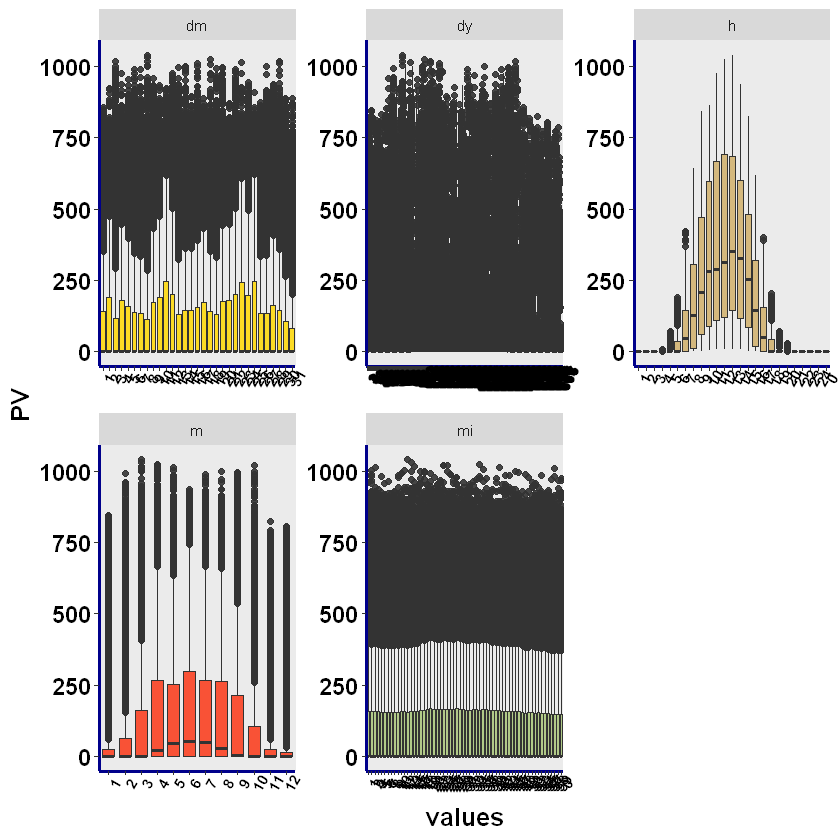

In [7]:
# Plot a box plot for each feature
categorical_featumatlabres %>%
  ggplot() +
  geom_boxplot(aes(x = values, y = PV, fill = features), alpha = 0.9, show.legend = F) +
  facet_wrap(~ features, scales = 'free') +
  paletteer::scale_fill_paletteer_d("tvthemes::simpsons")+
  theme(
    panel.grid = element_blank(),
    axis.text.x = element_text(angle = 90))+
  theme(legend.position = c(0.9, 0.9), legend.background = element_blank(),
      plot.title = element_text(color="red", size=15, face="bold.italic"),
      axis.title.x = element_text(color="black", size=15, face="bold"),
      axis.text.x = element_text(face="bold", color="black", size=9, angle = 60),
      axis.title.y = element_text(color="black", size=15, face="bold"),
      axis.text.y = element_text(face="bold", color="black", size=14),
      axis.line = element_line(colour = "darkblue", size = 1,
                               linetype = "solid"))

setwd("C:/Users/Daud/Google Drive/Phd Saarland/Paper by Dd/Phd_Themes/Res.2-Genration modeling (S-01.12.17)/Analysis of weather parameters/T1_RE_P2_Analysis_of_Solar_radiations-Saarbrucken_jan2018_files/New/")
#ggsave("./Pre.png",Final_m_plt)
ggsave(filename = "PV_cat_dis.png", width=15, height=5)
#plt.plot

In [39]:
# Create a data frame of numeric features & label
numeric_features <- Saar_hour %>% 
  select(c(G_Gk, Ta, PV))

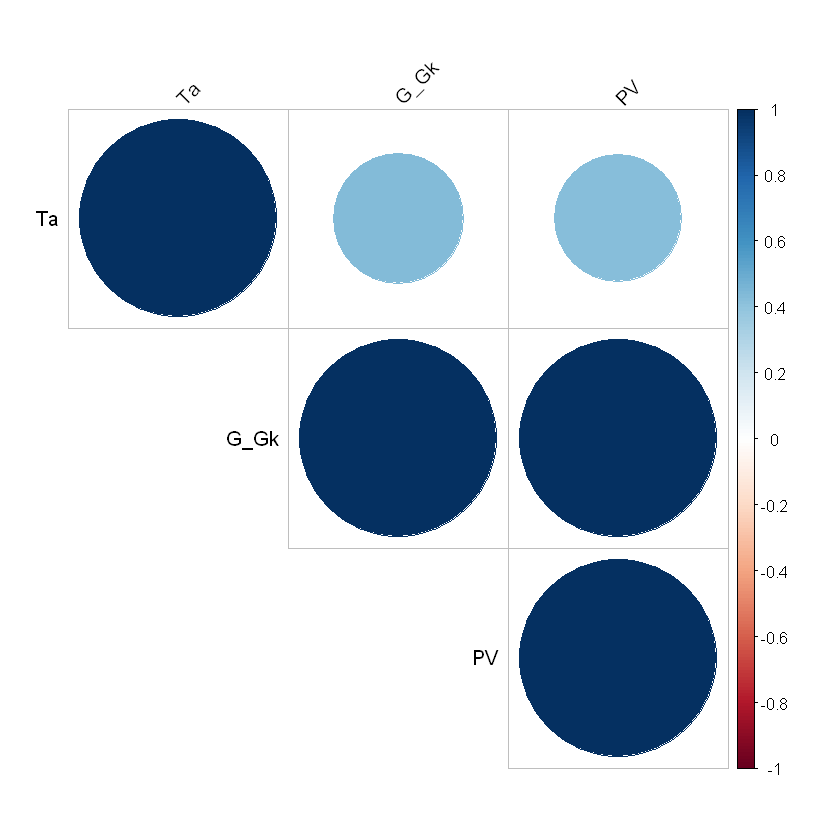

In [40]:
library(corrplot)

#Corr_Saar <- numeric_features %>% 

corrplot(cor(numeric_features), type = "upper", order = "hclust", 
         tl.col = "black", tl.srt = 45 # show only upper side
)

In [41]:
# Select desired features and labels

Saar_select <- Saar_hour %>% 
  select(c(G_Gk, Ta, PV))

#Saar_select <- Saar_hour %>% 
  #select(c(m, h, G_Gh, hs, G_Gex, G_Gh_hr, G_Dh, G_Gk, G_Dk, G_Bn, Ta, FF, G_Gcs, Td, PV)) %>% 
 # select(c(G_Gk, Ta, PV)) %>% 
  # Encode certain features as categorical
  #mutate(across(1:2, factor))

# Get a glimpse of your data
glimpse(Saar_select)

Rows: 8,760
Columns: 3
$ G_Gk <int> 0, 0, 0, 0, 0, 0, 0, 0, 1, 6, 12, 19, 22, 20, 15, 8, 1, 0, 0, 0, …
$ Ta   <dbl> 9.1, 10.1, 10.0, 9.9, 9.8, 9.7, 9.6, 9.5, 9.5, 9.5, 9.4, 9.5, 9.5…
$ PV   <int> 0, 0, 0, 0, 0, 0, 0, 0, 1, 5, 11, 17, 19, 17, 13, 7, 1, 0, 0, 0, …


In [42]:
# Split 70% of the data for training and the rest for testing
set.seed(2056)
Saar_split <- Saar_select %>% 
  initial_split(prop = 0.7,
  # splitting data evenly on the holiday variable
                pool = 0.1)

# Extract the data in each split
Saar_train <- training(Saar_split)
Saar_test <- testing(Saar_split)


cat("Training Set", nrow(Saar_train), "rows",
    "\nTest Set", nrow(Saar_test), "rows")


Training Set 6132 rows 
Test Set 2628 rows

In [15]:
gc() #This will free up unused RAM
gcinfo(TRUE)

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,2707870,144.7,4353834,232.6,4353834,232.6
Vcells,11786052,90.0,17905769,136.7,14563592,111.2


[1] FALSE

In [43]:
# Build a linear model specification
lm_spec <- 
  # Type
  linear_reg() %>% 
  # Engine
  set_engine("lm") %>% 
  # Mode
  set_mode("regression")

In [44]:
# Train a linear regression model
lm_mod <- lm_spec %>% 
  fit(PV ~ ., data = Saar_train)

# Print the model object
lm_mod


parsnip model object


Call:
stats::lm(formula = PV ~ ., data = data)

Coefficients:
(Intercept)         G_Gk           Ta  
     7.0978       0.8044      -0.5579  


In [45]:
# Make predictions on test set
pred <- lm_mod %>% 
  predict(new_data = Saar_test)

# View predictions
pred %>% 
  slice_head(n = 5)

.pred
<dbl>
2.020942
1.463044
1.518834
1.630413
1.797783


In [46]:
# Predict rentals for the test set and bind it to the test_set
results <- Saar_test %>% 
  bind_cols(lm_mod %>% 
    # Predict rentals
    predict(new_data = Saar_test) %>% 
      rename(predictions = .pred))

# Compare predictions
results %>% 
  select(c(PV, predictions)) %>% 
  slice_head(n = 10)


PV,predictions
<int>,<dbl>
0,2.020942
0,1.463044
0,1.518834
0,1.630413
0,1.797783
5,6.624165
11,11.506338
19,19.494519
17,17.885725


`geom_smooth()` using formula 'y ~ x'



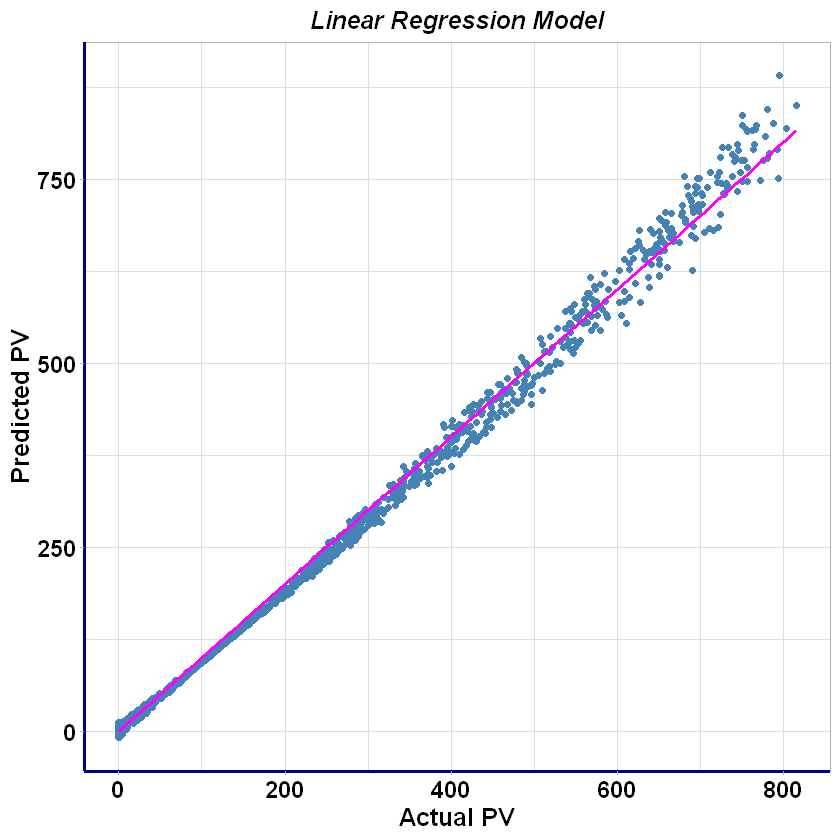

In [47]:
# Visualise the results
results %>% 
  ggplot(mapping = aes(x = PV, y = predictions)) +
  geom_point(size = 1.6, color = "steelblue") +
  # Overlay a regression line
  geom_smooth(method = "lm", se = F, color = 'magenta') +
  ggtitle("Linear Regression Model") +
  xlab("Actual PV") +
  ylab("Predicted PV") +
  theme(plot.title = element_text(hjust = 0.5))+
  theme(legend.position = c(0.9, 0.9), legend.background = element_blank(),
      plot.title = element_text(color="black", size=15, face="bold.italic"),
      axis.title.x = element_text(color="black", size=15, face="bold"),
      axis.text.x = element_text(face="bold", color="black", size=14, angle = 0),
      axis.title.y = element_text(color="black", size=15, face="bold"),
      axis.text.y = element_text(face="bold", color="black", size=14),
      axis.line = element_line(colour = "darkblue", size = 1,
                               linetype = "solid"))


In [48]:
# Multiple regression metrics
eval_metrics <- metric_set(rmse, rsq, mae, ccc)

# Evaluate RMSE, R2 based on the results
eval_metrics(data = results,
             truth = PV,
             estimate = predictions)


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,11.4207646
rsq,standard,0.9967547
mae,standard,7.1886004
ccc,standard,0.9983746


`geom_smooth()` using formula 'y ~ x'



[[1]]
# A tibble: 4 × 3
  .metric .estimator .estimate
  <chr>   <chr>          <dbl>
1 rmse    standard      11.6  
2 rsq     standard       0.997
3 mae     standard       6.98 
4 ccc     standard       0.998

[[2]]


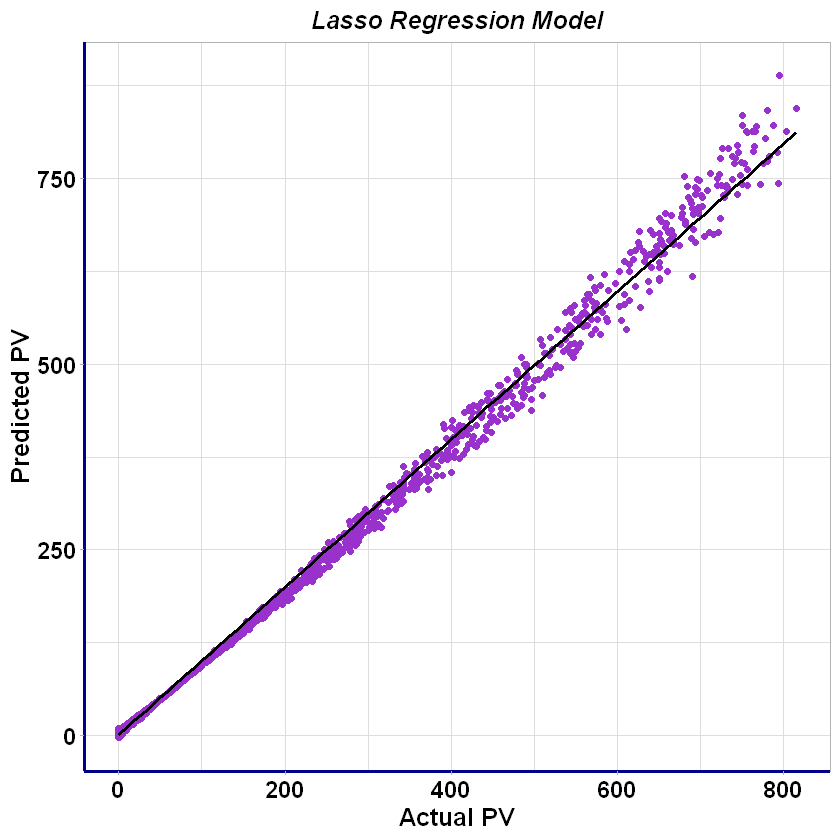

In [49]:
# Build a lasso model specification
lasso_spec <- linear_reg(
  engine = "glmnet",
  mode = "regression",
  penalty = 1,
  mixture = 1)

# Train a lasso regression model
lasso_mod <- lasso_spec %>% 
  fit(PV ~ ., data = Saar_train)

# Make predictions for test data
results_lasso <- Saar_test %>% 
  bind_cols(lasso_mod %>% predict(new_data = Saar_test) %>% 
              rename(predictions = .pred))

# Multiple regression metrics
eval_metrics <- metric_set(rmse, rsq, mae, ccc)

# Evaluate the model
lasso_metrics <- eval_metrics(data = results_lasso,
                                    truth = PV,
                                    estimate = predictions) 


# Plot predicted vs actual
theme_set(theme_light())
lasso_plt <- results_lasso %>% 
  ggplot(mapping = aes(x = PV, y = predictions)) +
  geom_point(size = 1.6, color = 'darkorchid') +
  # overlay regression line
  geom_smooth(method = 'lm', color = 'black', se = F) +
  ggtitle("Lasso Regression Model") +
  xlab("Actual PV") +
  ylab("Predicted PV") +
  theme(plot.title = element_text(hjust = 0.5))+
  theme(legend.position = c(0.9, 0.9), legend.background = element_blank(),
      plot.title = element_text(color="black", size=15, face="bold.italic"),
      axis.title.x = element_text(color="black", size=15, face="bold"),
      axis.text.x = element_text(face="bold", color="black", size=14, angle = 0),
      axis.title.y = element_text(color="black", size=15, face="bold"),
      axis.text.y = element_text(face="bold", color="black", size=14),
      axis.line = element_line(colour = "darkblue", size = 1,
                               linetype = "solid"))

# Return evaluations
list(lasso_metrics, lasso_plt)
  

In [50]:
# Build a decision tree specification
tree_spec <- decision_tree(
  engine = "rpart",
  mode = "regression")

# Train a decision tree model 
tree_mod <- tree_spec %>% 
  fit(PV ~ ., data = Saar_train)

# Print model
tree_mod

# Make and bind predictions to test data a
results_DT <- tree_mod %>% 
  augment(new_data = Saar_test) %>% 
  rename(predictions = .pred)

parsnip model object

n= 6132 

node), split, n, deviance, yval
      * denotes terminal node

 1) root 6132 241220200.0 123.82520  
   2) G_Gk< 301.5 4860  19033070.0  33.07058  
     4) G_Gk< 95.5 4043   1209817.0   7.50136 *
     5) G_Gk>=95.5 817   2099624.0 159.60220 *
   3) G_Gk>=301.5 1272  29217610.0 470.57630  
     6) G_Gk< 598.5 735   3433336.0 358.44760  
      12) G_Gk< 434.5 376    448516.9 301.88300 *
      13) G_Gk>=434.5 359    521782.7 417.69080 *
     7) G_Gk>=598.5 537   3894903.0 624.04840  
      14) G_Gk< 784.5 275    549605.1 555.23270 *
      15) G_Gk>=784.5 262    676100.7 696.27860 *

`geom_smooth()` using formula 'y ~ x'



[[1]]
# A tibble: 4 × 3
  .metric .estimator .estimate
  <chr>   <chr>          <dbl>
1 rmse    standard      30.0  
2 rsq     standard       0.978
3 mae     standard      20.6  
4 ccc     standard       0.989

[[2]]


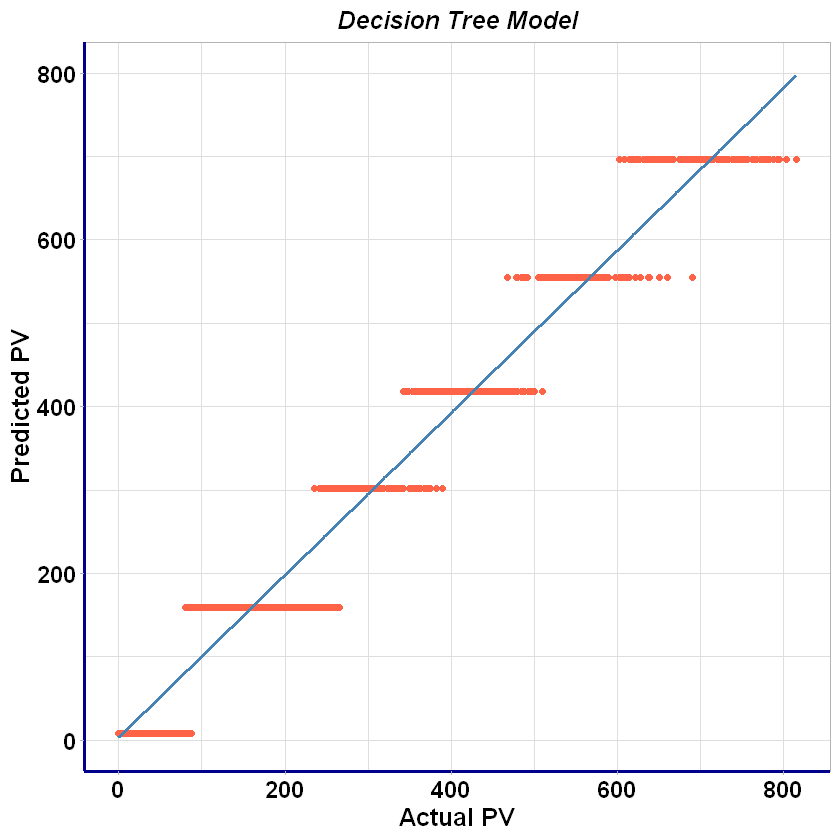

In [51]:
# Multiple regression metrics
eval_metrics <- metric_set(rmse, rsq, mae, ccc)

# Evaluate the model
tree_metrics <- eval_metrics(data = results_DT,
                                  truth = PV,
                                  estimate = predictions)

# Plot predicted vs actual
tree_plt <- results_DT %>% 
  ggplot(mapping = aes(x = PV, y = predictions)) +
  geom_point(color = 'tomato') +
  # overlay regression line
  geom_smooth(method = 'lm', color = 'steelblue', se = F) +
  ggtitle("Decision Tree Model") +
  xlab("Actual PV") +
  ylab("Predicted PV") +
  theme(plot.title = element_text(hjust = 0.5))+
  theme(legend.position = c(0.9, 0.9), legend.background = element_blank(),
      plot.title = element_text(color="black", size=15, face="bold.italic"),
      axis.title.x = element_text(color="black", size=15, face="bold"),
      axis.text.x = element_text(face="bold", color="black", size=14, angle = 0),
      axis.title.y = element_text(color="black", size=15, face="bold"),
      axis.text.y = element_text(face="bold", color="black", size=14),
      axis.line = element_line(colour = "darkblue", size = 1,
                               linetype = "solid"))
# Return evaluations
list(tree_metrics, tree_plt)

In [18]:
gc()

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,3061824,163.6,5796114,309.6,5796114,309.6
Vcells,34029320,259.7,95418820,728.0,95407379,728.0


In [52]:
# For reproducibility
#set.seed(2056)

# Build a random forest model specification
rf_spec <- rand_forest() %>% 
  set_engine('randomForest') %>% 
  set_mode('regression')

# Train a random forest model 
rf_mod <- rf_spec %>% 
  fit(PV ~ ., data = Saar_train)

# Print model
rf_mod

parsnip model object


Call:
 randomForest(x = maybe_data_frame(x), y = y) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 1

          Mean of squared residuals: 28.42079
                    % Var explained: 99.93

In [53]:

# Make and bind predictions to test data a
results_RF <- rf_mod %>% 
  augment(new_data = Saar_test) %>% 
  rename(predictions = .pred)


# Multiple regression metrics
eval_metrics <- metric_set(rmse, rsq, mae, ccc)


# Evaluate the model
rf_metrics <- eval_metrics(data = results_RF,
                                  truth = PV,
                                  estimate = predictions)



`geom_smooth()` using formula 'y ~ x'



[[1]]
# A tibble: 4 × 3
  .metric .estimator .estimate
  <chr>   <chr>          <dbl>
1 rmse    standard       6.31 
2 rsq     standard       0.999
3 mae     standard       2.33 
4 ccc     standard       0.999

[[2]]


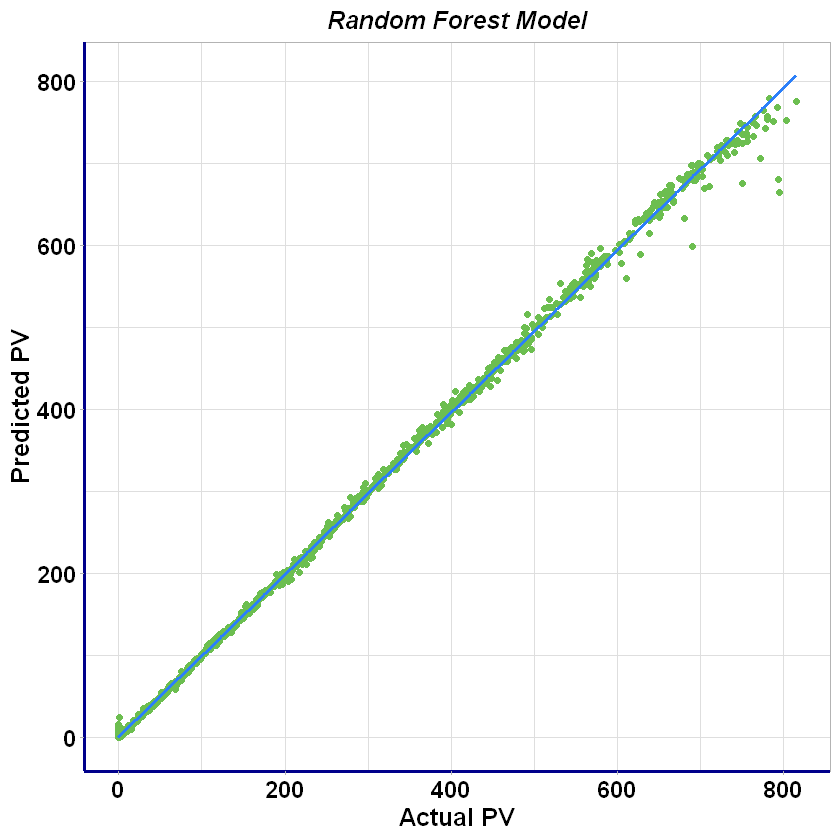

In [54]:

# Plot predicted vs actual
rf_plt <- results_RF %>% 
  ggplot(mapping = aes(x = PV, y = predictions)) +
  geom_point(color = '#6CBE50FF') +
  # overlay regression line
  geom_smooth(method = 'lm', color = '#2B7FF9FF', se = F) +
  ggtitle("Random Forest Model") +
  xlab("Actual PV") +
  ylab("Predicted PV") +
  theme(plot.title = element_text(hjust = 0.5))+
  theme(legend.position = c(0.9, 0.9), legend.background = element_blank(),
      plot.title = element_text(color="black", size=15, face="bold.italic"),
      axis.title.x = element_text(color="black", size=15, face="bold"),
      axis.text.x = element_text(face="bold", color="black", size=14, angle = 0),
      axis.title.y = element_text(color="black", size=15, face="bold"),
      axis.text.y = element_text(face="bold", color="black", size=14),
      axis.line = element_line(colour = "darkblue", size = 1,
                               linetype = "solid"))

# Return evaluations
list(rf_metrics, rf_plt)


parsnip model object

##### xgb.Booster
raw: 54.8 Kb 
call:
  xgboost::xgb.train(params = list(eta = 0.3, max_depth = 6, gamma = 0, 
    colsample_bytree = 1, colsample_bynode = 1, min_child_weight = 1, 
    subsample = 1), data = x$data, nrounds = 15, watchlist = x$watchlist, 
    verbose = 0, nthread = 1, objective = "reg:squarederror")
params (as set within xgb.train):
  eta = "0.3", max_depth = "6", gamma = "0", colsample_bytree = "1", colsample_bynode = "1", min_child_weight = "1", subsample = "1", nthread = "1", objective = "reg:squarederror", validate_parameters = "TRUE"
xgb.attributes:
  niter
callbacks:
  cb.evaluation.log()
# of features: 2 
niter: 15
nfeatures : 2 
evaluation_log:
    iter training_rmse
       1    164.228805
       2    115.580453
---                   
      14      3.270424
      15      2.895744

`geom_smooth()` using formula 'y ~ x'



[[1]]
# A tibble: 4 × 3
  .metric .estimator .estimate
  <chr>   <chr>          <dbl>
1 rmse    standard        4.06
2 rsq     standard        1.00
3 mae     standard        1.68
4 ccc     standard        1.00

[[2]]


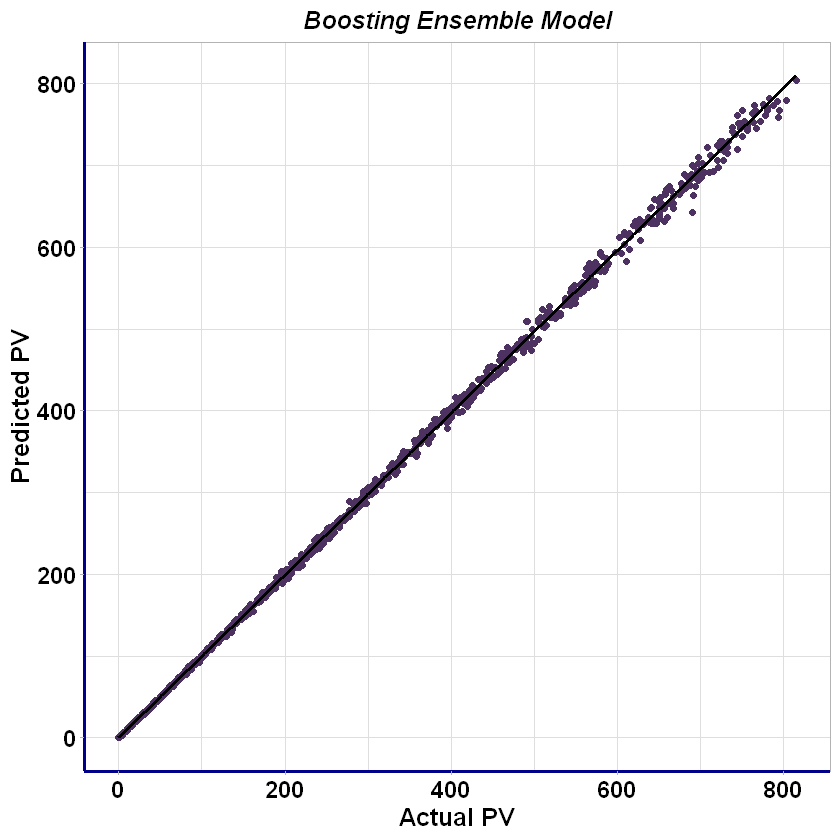

In [55]:
# For reproducibility
set.seed(2056)

# Build an xgboost model specification
boost_spec <- boost_tree() %>% 
  set_engine('xgboost') %>% 
  set_mode('regression')

# Train an xgboost model 
boost_mod <- boost_spec %>% 
  fit(PV ~ ., data = Saar_train)


# Print model
boost_mod


# Make and bind predictions to test data a
results_BT <- boost_mod %>% 
  augment(new_data = Saar_test) %>% 
  rename(predictions = .pred)

# Multiple regression metrics
eval_metrics <- metric_set(rmse, rsq, mae, ccc)


# Evaluate the model
rf_metrics <- eval_metrics(data = results_BT,
                                  truth = PV,
                                  estimate = predictions)


# Evaluate the model
boost_metrics <- eval_metrics(data = results_BT,
                                  truth = PV,
                                  estimate = predictions) 

# Plot predicted vs actual
boost_plt <- results_BT %>% 
  ggplot(mapping = aes(x = PV, y = predictions)) +
  geom_point(color = '#4D3161FF') +
  # overlay regression line
  geom_smooth(method = 'lm', color = 'black', se = F) +
  ggtitle("Boosting Ensemble Model") +
  xlab("Actual PV") +
  ylab("Predicted PV") +
  theme(plot.title = element_text(hjust = 0.5))+
  theme(legend.position = c(0.9, 0.9), legend.background = element_blank(),
      plot.title = element_text(color="black", size=15, face="bold.italic"),
      axis.title.x = element_text(color="black", size=15, face="bold"),
      axis.text.x = element_text(face="bold", color="black", size=14, angle = 0),
      axis.title.y = element_text(color="black", size=15, face="bold"),
      axis.text.y = element_text(face="bold", color="black", size=14),
      axis.line = element_line(colour = "darkblue", size = 1,
                               linetype = "solid"))
# Return evaluations
list(boost_metrics, boost_plt)

In [56]:
# Specify a recipe
Saar_recipe <- recipe(PV ~ ., data = Saar_train) %>% 
  step_normalize(all_numeric_predictors()) %>% 
  step_dummy(all_nominal_predictors()) 

# Print out recipe
Saar_recipe


# Summary of the recipe
summary(Saar_recipe)

Recipe

Inputs:

      role #variables
   outcome          1
 predictor          2

Operations:

Centering and scaling for all_numeric_predictors()
Dummy variables from all_nominal_predictors()

variable,type,role,source
<chr>,<chr>,<chr>,<chr>
G_Gk,numeric,predictor,original
Ta,numeric,predictor,original
PV,numeric,outcome,original


In [57]:
# xgboost specification
boost_spec <- boost_tree() %>% 
  set_engine('xgboost') %>% 
  set_mode('regression')

# Create the workflow
boost_workflow <- workflow() %>% 
  add_recipe(Saar_recipe) %>% 
  add_model(boost_spec)

# Print out workflow
boost_workflow


══ Workflow ════════════════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: boost_tree()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_normalize()
• step_dummy()

── Model ───────────────────────────────────────────────────────────────────────
Boosted Tree Model Specification (regression)

Computational engine: xgboost 


In [58]:
# Train the model
boost_workflow <- boost_workflow %>% 
  fit(data = Saar_train)

boost_workflow

boost_workflow %>% 
  predict(new_data = Saar_test %>% dplyr::slice(1:6))



══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: boost_tree()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_normalize()
• step_dummy()

── Model ───────────────────────────────────────────────────────────────────────
##### xgb.Booster
raw: 54.8 Kb 
call:
  xgboost::xgb.train(params = list(eta = 0.3, max_depth = 6, gamma = 0, 
    colsample_bytree = 1, colsample_bynode = 1, min_child_weight = 1, 
    subsample = 1), data = x$data, nrounds = 15, watchlist = x$watchlist, 
    verbose = 0, nthread = 1, objective = "reg:squarederror")
params (as set within xgb.train):
  eta = "0.3", max_depth = "6", gamma = "0", colsample_bytree = "1", colsample_bynode = "1", min_child_weight = "1", subsample = "1", nthread = "1", objective = "reg:squarederror", validate_parameters = "TRUE"
xgb.attributes:
  niter
callbacks:
  cb.evaluation.log()
# of features: 2 
niter: 15
nfeatures : 2 
e

.pred
<dbl>
0.003309191
0.003309191
0.003309191
0.003309191
0.003309191
5.177103996


In [59]:
args(boost_tree)

function (mode = "unknown", engine = "xgboost", mtry = NULL, 
    trees = NULL, min_n = NULL, tree_depth = NULL, learn_rate = NULL, 
    loss_reduction = NULL, sample_size = NULL, stop_iter = NULL) 
NULL

In [60]:
# Specify a recipe
Saar_recipe <- recipe(PV ~ ., data = Saar_train) %>% 
  step_normalize(all_numeric_predictors()) %>% 
  step_dummy(all_nominal_predictors()) 


# Make a tunable model specification
boost_spec <- boost_tree(trees = 50,
                         tree_depth = tune(),
                         learn_rate = tune()) %>% 
  set_engine('xgboost') %>% 
  set_mode('regression')


# Bundle a recipe and model spec using a workflow
boost_workflow <- workflow() %>% 
  add_recipe(Saar_recipe) %>% 
  add_model(boost_spec)

# Print workflow
boost_workflow



══ Workflow ════════════════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: boost_tree()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_normalize()
• step_dummy()

── Model ───────────────────────────────────────────────────────────────────────
Boosted Tree Model Specification (regression)

Main Arguments:
  trees = 50
  tree_depth = tune()
  learn_rate = tune()

Computational engine: xgboost 


tree_depth,learn_rate
<int>,<dbl>
1,0.0100
4,0.0100
8,0.0100
11,0.0100
15,0.0100
1,0.0825
4,0.0825
8,0.0825
11,0.0825


tree_depth,learn_rate,.metric,.estimator,mean,n,std_err,.config
<int>,<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
11,0.1550,rmse,standard,2.912417,5,0.12345700,Preprocessor1_Model14
8,0.1550,rmse,standard,2.916236,5,0.10681411,Preprocessor1_Model13
8,0.2275,rmse,standard,2.937550,5,0.10166316,Preprocessor1_Model18
15,0.1550,rmse,standard,2.943331,5,0.12863689,Preprocessor1_Model15
11,0.2275,rmse,standard,2.949108,5,0.08805853,Preprocessor1_Model19


tree_depth,learn_rate,.config
<int>,<dbl>,<chr>
11,0.155,Preprocessor1_Model14


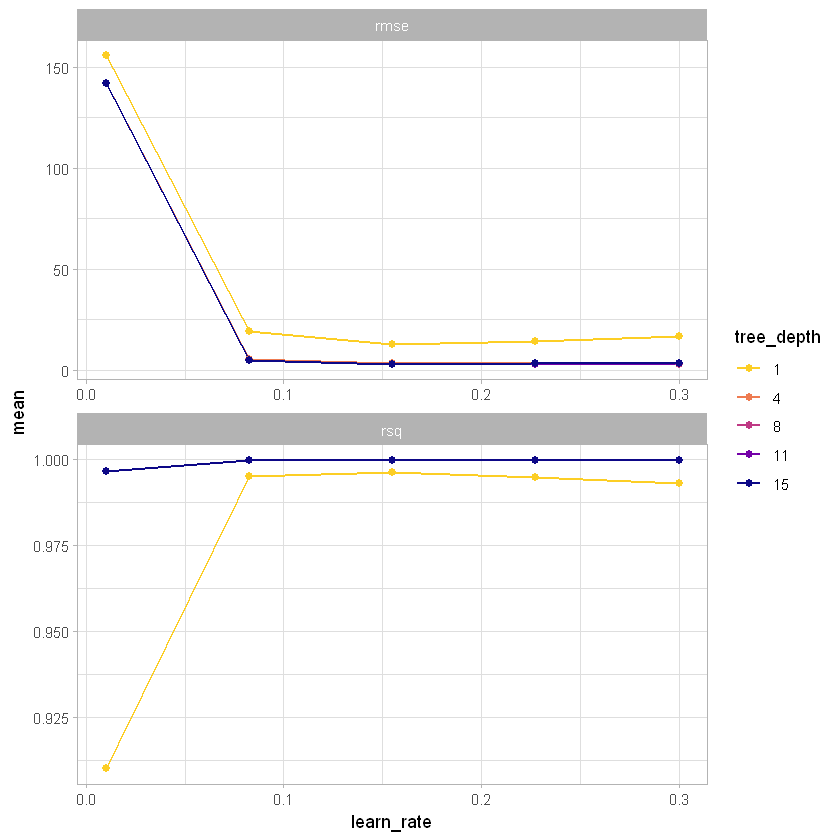

In [61]:
# Create a grid of tuning parameters
tree_grid <- grid_regular(tree_depth(),
                  # You can specify hyperparameter ranges too
learn_rate(range = c(0.01, 0.3), trans = NULL), levels = 5)

# Display hyperparameter combinations that will be used for tuning
tree_grid

set.seed(2056)
# 5 fold CV repeated once
Saar_folds <- vfold_cv(data = Saar_train, v = 5, repeats = 1)


# Allow parallel processing
doParallel::registerDoParallel()

# Model tuning via grid search
set.seed(2020)
tree_grid <- tune_grid(
  object = boost_workflow,
  resamples = Saar_folds,
  grid = tree_grid
)


# Visualize the results
tree_grid %>% 
  collect_metrics() %>% 
  mutate(tree_depth = factor(tree_depth)) %>% 
  ggplot(mapping = aes(x = learn_rate, y = mean,
                       color = tree_depth)) +
  geom_line(size = 0.6) +
  geom_point(size = 2) +
  facet_wrap(~ .metric, scales = 'free', nrow = 2)+
  scale_color_viridis_d(option = "plasma", begin = .9, end = 0)


tree_grid %>% 
  show_best('rmse')

# Select the tree with the best RMSE
best_tree <- tree_grid %>% 
  select_best('rmse')

# Display best tree
best_tree


In [62]:
# Update workflow
final_wf <- boost_workflow %>% 
  finalize_workflow(best_tree)

# Print final workflow
final_wf

# Make a last fit
final_fit <- final_wf %>% 
  last_fit(Saar_split)


# Collect metrics
final_fit %>% 
  collect_metrics()

══ Workflow ════════════════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: boost_tree()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_normalize()
• step_dummy()

── Model ───────────────────────────────────────────────────────────────────────
Boosted Tree Model Specification (regression)

Main Arguments:
  trees = 50
  tree_depth = 11
  learn_rate = 0.155

Computational engine: xgboost 


.metric,.estimator,.estimate,.config
<chr>,<chr>,<dbl>,<chr>
rmse,standard,2.7152237,Preprocessor1_Model1
rsq,standard,0.9998165,Preprocessor1_Model1


In [63]:
# Extract trained workflow
Saar_boost_model <- final_fit$.workflow[[1]]

# Save trained workflow
saveRDS(Saar_boost_model, 'Saar_boost_model.rds')

# Load the model
loaded_model <- readRDS("Saar_boost_model.rds")

# Extract predictors
bike_new <- Saar_test %>% 
  dplyr::slice(5:9)

# Use the model to predict rentals
results_FN <- loaded_model %>% 
  augment(Saar_test)

# See model predictions 
results_FN

G_Gk,Ta,PV,.pred
<int>,<dbl>,<int>,<dbl>
0,9.1,0,5.012153e-04
0,10.1,0,5.012153e-04
0,10.0,0,5.012153e-04
0,9.8,0,5.012153e-04
0,9.5,0,5.012153e-04
6,9.5,5,5.605088e+00
12,9.4,11,1.054826e+01
22,9.5,19,1.922590e+01
20,9.5,17,1.749993e+01


In [64]:
# Replace negatives in column StudyHours with the mean study hours
results_FN <- results_FN %>%
  mutate(predictions = replace(.pred, .pred < 0, 0))
# Print the data frame
results_FN


G_Gk,Ta,PV,.pred,predictions
<int>,<dbl>,<int>,<dbl>,<dbl>
0,9.1,0,5.012153e-04,5.012153e-04
0,10.1,0,5.012153e-04,5.012153e-04
0,10.0,0,5.012153e-04,5.012153e-04
0,9.8,0,5.012153e-04,5.012153e-04
0,9.5,0,5.012153e-04,5.012153e-04
6,9.5,5,5.605088e+00,5.605088e+00
12,9.4,11,1.054826e+01,1.054826e+01
22,9.5,19,1.922590e+01,1.922590e+01
20,9.5,17,1.749993e+01,1.749993e+01


In [65]:

theme_set(theme_light())
Final_mplt <- results_FN %>% 
  select(c(m, PV , predictions)) %>% 

ggplot(mapping = aes(x = m, y = PV-predictions)) +
  geom_boxplot()+
  #, alpha = 0.9, show.legend = F) +
  #facet_wrap(~ h, scales = 'free') +
  # overlay regression line
  ggtitle("") +
  xlab("Month") +
  ylab("Residuals") +
  paletteer::scale_fill_paletteer_d("tvthemes::simpsons")+
  theme(
    panel.grid = element_blank(),
    axis.text.x = element_text(angle = 60))+
  theme(legend.position = c(0.9, 0.9), legend.background = element_blank(),
      plot.title = element_text(color="black", size=15, face="bold.italic"),
      axis.title.x = element_text(color="black", size=15, face="bold"),
      axis.text.x = element_text(face="bold", color="black", size=14, angle = 0),
      axis.title.y = element_text(color="black", size=15, face="bold"),
      axis.text.y = element_text(face="bold", color="black", size=14),
      axis.line = element_line(colour = "darkblue", size = 1,
                               linetype = "solid"))

 #ggplot(mapping = aes(x = PV, y = predictions)) +
 # geom_point(color = '#4D3161FF') +
 # # overlay regression line
 # geom_smooth(method = 'lm', color = 'black', se = F) +
 # ggtitle("Daily Bike Share Predictions") +
 # xlab("Actual Labels") +
 # ylab("Predicted Labels") +
 # theme(plot.title = element_text(hjust = 0.5))
setwd("C:/Users/Daud/Google Drive/Phd Saarland/Paper by Dd/Phd_Themes/Res.2-Genration modeling (S-01.12.17)/Analysis of weather parameters/T1_RE_P2_Analysis_of_Solar_radiations-Saarbrucken_jan2018_files/New/")
#ggsave("./Pre.png",Final_m_plt)
ggsave(filename = "MonRes.png", width=10, height=5)
#plt.plot

list(Final_mplt)


ERROR: [1m[33mError[39m in [1m[1m`select()`:[22m
[33m![39m Can't subset columns that don't exist.
[31m✖[39m Column `m` doesn't exist.


[[1]]


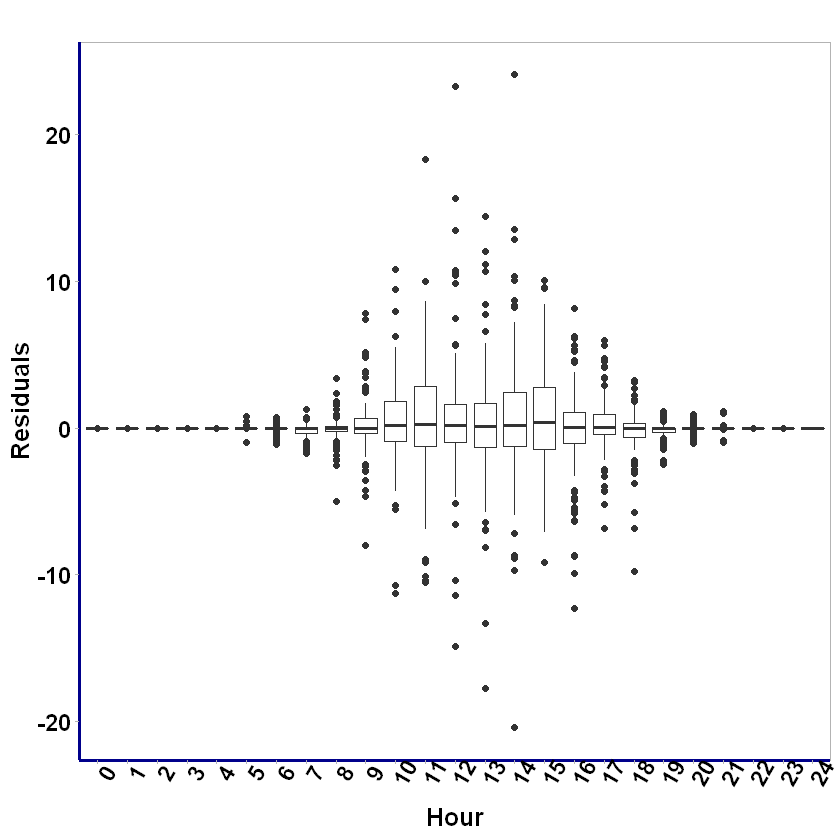

In [46]:
theme_set(theme_light())
Final_hplt <- results_FN %>% 
  select(c(h, PV , predictions)) %>% 

ggplot(mapping = aes(x = h, y = PV-predictions)) +
  geom_boxplot()+
  #, alpha = 0.9, show.legend = F) +
  #facet_wrap(~ h, scales = 'free') +
  ggtitle("") +
  xlab("Hour") +
  ylab("Residuals") +
  paletteer::scale_fill_paletteer_d("tvthemes::simpsons")+
  theme(
    panel.grid = element_blank(),
    axis.text.x = element_text(angle = 60))+
  theme(legend.position = c(0.9, 0.9), legend.background = element_blank(),
      plot.title = element_text(color="black", size=15, face="bold.italic"),
      axis.title.x = element_text(color="black", size=15, face="bold"),
      axis.text.x = element_text(face="bold", color="black", size=14, angle = 60),
      axis.title.y = element_text(color="black", size=15, face="bold"),
      axis.text.y = element_text(face="bold", color="black", size=14),
      axis.line = element_line(colour = "darkblue", size = 1,
                               linetype = "solid"))


list(Final_hplt)

setwd("C:/Users/Daud/Google Drive/Phd Saarland/Paper by Dd/Phd_Themes/Res.2-Genration modeling (S-01.12.17)/Analysis of weather parameters/T1_RE_P2_Analysis_of_Solar_radiations-Saarbrucken_jan2018_files/New/")
#ggsave("./Pre.png",Final_m_plt)
ggsave(filename = "HrRes.png", width=10, height=5)
#plt.plot



In [47]:
theme_set(theme_light())
Final_dmplt <- results_FN %>% 
  select(c(dm, PV , predictions)) %>% 

ggplot(mapping = aes(x = dm, y = PV-predictions)) +
  geom_boxplot()+
  #, alpha = 0.9, show.legend = F) +
  #facet_wrap(~ h, scales = 'free') +
  paletteer::scale_fill_paletteer_d("tvthemes::simpsons")+
  theme(
    panel.grid = element_blank(),
    axis.text.x = element_text(angle = 90))

 #ggplot(mapping = aes(x = PV, y = predictions)) +
 # geom_point(color = '#4D3161FF') +
 # # overlay regression line
 # geom_smooth(method = 'lm', color = 'black', se = F) +
 # ggtitle("Daily Bike Share Predictions") +
 # xlab("Actual Labels") +
 # ylab("Predicted Labels") +
 # theme(plot.title = element_text(hjust = 0.5))


list(Final_dmplt)

ERROR: [1m[33mError[39m in [1m[1m`select()`:[22m
[33m![39m Can't subset columns that don't exist.
[31m✖[39m Column `dm` doesn't exist.


`geom_smooth()` using formula 'y ~ x'



[[1]]
# A tibble: 4 × 3
  .metric .estimator .estimate
  <chr>   <chr>          <dbl>
1 rmse    standard        2.72
2 rsq     standard        1.00
3 mae     standard        1.11
4 ccc     standard        1.00

[[2]]


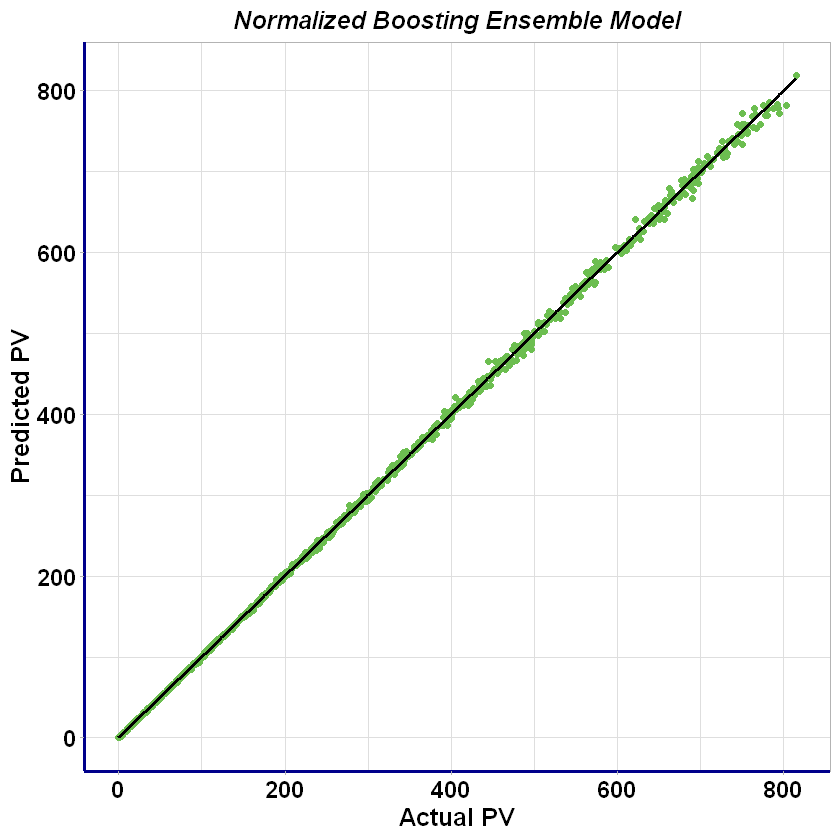

In [66]:
# For reproducibility
set.seed(2056)

# Evaluate the model
boost_metrics <- eval_metrics(data = results_FN,
                                  truth = PV,
                                  estimate = predictions) 

# Plot predicted vs actual
boost_plt <- results_FN %>% 
  ggplot(mapping = aes(x = PV, y = predictions)) +
  geom_point(color = '#6CBE50FF') +
  geom_smooth(method = 'lm', color = 'black', se = F) +
  # overlay regression line
  ggtitle("Normalized Boosting Ensemble Model") +
  xlab("Actual PV") +
  ylab("Predicted PV") +
  theme(plot.title = element_text(hjust = 0.5))+
  theme(legend.position = c(0.9, 0.9), legend.background = element_blank(),
      plot.title = element_text(color="black", size=15, face="bold.italic"),
      axis.title.x = element_text(color="black", size=15, face="bold"),
      axis.text.x = element_text(face="bold", color="black", size=14, angle = 0),
      axis.title.y = element_text(color="black", size=15, face="bold"),
      axis.text.y = element_text(face="bold", color="black", size=14),
      axis.line = element_line(colour = "darkblue", size = 1,
                               linetype = "solid"))

# Return evaluations
list(boost_metrics, boost_plt)

In [49]:
Final_plt_h <- results_FN %>% 
  select(c(h, PV , predictions)) %>% 
  group_by(h)%>%
  summarise(mean_pv = mean(PV),mean_pre = mean(predictions))
  

#ggplot(mapping = aes(x = h, y = PV)) +
#  geom_boxplot()+
  #, alpha = 0.9, show.legend = F) +
  #facet_wrap(~ h, scales = 'free') +
 # paletteer::scale_fill_paletteer_d("tvthemes::simpsons")+
 # theme(
 #   panel.grid = element_blank(),
 #   axis.text.x = element_text(angle = 90))

list(Final_plt_h)

h,mean_pv,mean_pre
<fct>,<dbl>,<dbl>
0,0.0000000,1.518975e-04
1,0.0000000,1.518358e-04
2,0.0000000,1.427197e-04
3,0.0000000,1.428477e-04
4,0.0000000,1.777930e-04
5,0.1081081,1.034824e-01
6,6.6571429,6.687425e+00
7,33.4380952,3.356073e+01
8,84.8285714,8.490708e+01


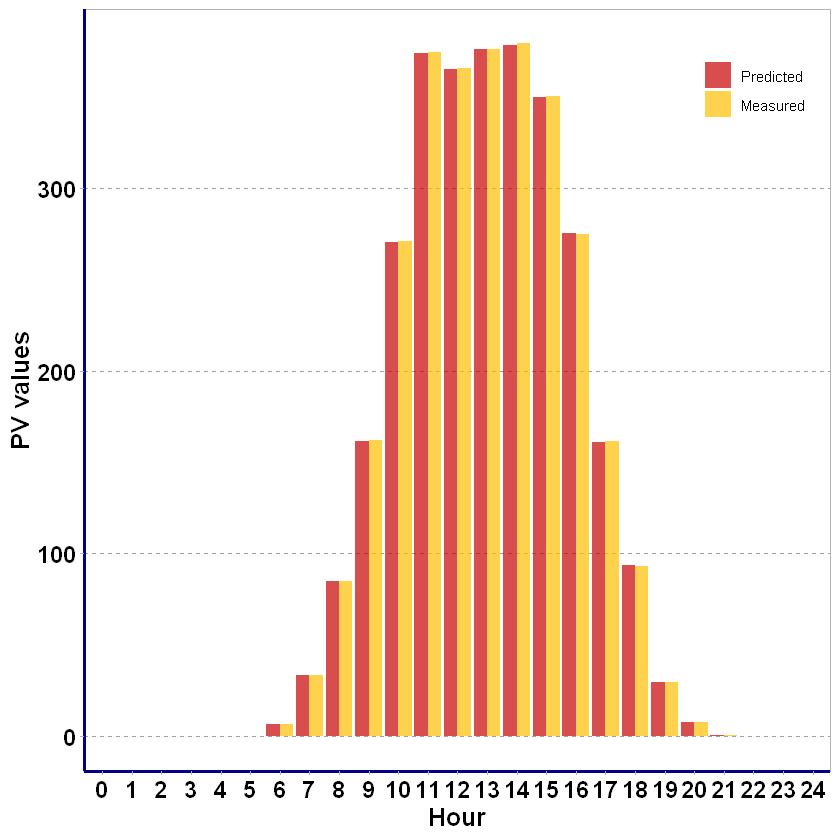

In [50]:
df_final <- Final_plt_h %>% 
  select(h, mean_pv, mean_pre) %>%
  #mutate(m = fct_reorder(m, .desc = TRUE)) %>% 
  pivot_longer(!h, names_to = "Metrics", values_to = "Values")

# Compare numeric variables with bar plots
ggplot(data = df_final) +
  geom_bar(mapping = aes(x = h, y = Values, fill = factor(Metrics,labels=c("Predicted","Measured"))), alpha = 0.7, stat = "identity", position = position_dodge(width = 0.9)) +
  xlab('Hour') +
  ylab('PV values') +
  scale_fill_paletteer_d("calecopal::kelp1") +
  theme(
    panel.grid = element_blank(),
    panel.grid.major.y = element_line(color = '#95a5a6',
                                      linetype = 'dashed',
                                      size = 0.5),
    axis.text.x = element_text(angle = 90),
    legend.title = element_blank()
    
  )+
  theme(legend.position = c(0.9, 0.9), legend.background = element_blank(),
      plot.title = element_text(color="black", size=15, face="bold.italic"),
      axis.title.x = element_text(color="black", size=15, face="bold"),
      axis.text.x = element_text(face="bold", color="black", size=14, angle = 0),
      axis.title.y = element_text(color="black", size=15, face="bold"),
      axis.text.y = element_text(face="bold", color="black", size=14),
      axis.line = element_line(colour = "darkblue", size = 1,
                               linetype = "solid"))

setwd("C:/Users/Daud/Google Drive/Phd Saarland/Paper by Dd/Phd_Themes/Res.2-Genration modeling (S-01.12.17)/Analysis of weather parameters/T1_RE_P2_Analysis_of_Solar_radiations-Saarbrucken_jan2018_files/New/")
#ggsave("./Pre.png",Final_m_plt)
ggsave(filename = "hpred.png", width=10, height=5)
#plt.plot


In [51]:
#theme_set(theme_light())
#r_int <- as.integer(Final_plt$mean_pre)
#df<-data.frame(Final_plt$h,Final_plt$mean_pre, Final_plt$mean_pv)
#g<-ggplot(df, aes(Final_plt$h, Final_plt$mean_pv))+ geom_bar(stat = "identity", colour="red")
#g<-g+geom_bar(data=df, aes(Final_plt$h, Final_plt$mean_pre), stat = "identity", colour="blue")
#print(g)

In [52]:
df1<-data.frame(x=Final_plt$h,y=Final_plt$mean_pre)
df2<-data.frame(x=Final_plt$h,y=Final_plt$mean_pv)
df1
ggplot(df1, aes(x,y))+geom_dotplot(aes(colour="red"),binaxis = "y", stackdir = "center", fill = "white", stroke = 2)+
  geom_dotplot(data = df2,aes(colour="blue"),binaxis = "y", stackdir = "center",dotsize = 0.5)+
  labs(color="Legend text")


#ggplot(data=Final_plt1,aes(x = h, y = mean_pre))+geom_line(aes(color="First line"))+
#  geom_line(data=Final_plt2,aes(color="Second line"))+
#  labs(color="Legend text")

ERROR: Error in data.frame(x = Final_plt$h, y = Final_plt$mean_pre): object 'Final_plt' not found


m,mean_pv,mean_pre
<fct>,<dbl>,<dbl>
1,59.48954,59.00298
2,79.57838,79.00846
3,132.63393,132.55344
4,171.80303,171.45757
5,155.65899,156.28224
6,194.53488,194.85705
7,169.58261,169.93274
8,181.72458,181.80743
9,143.89720,143.54853


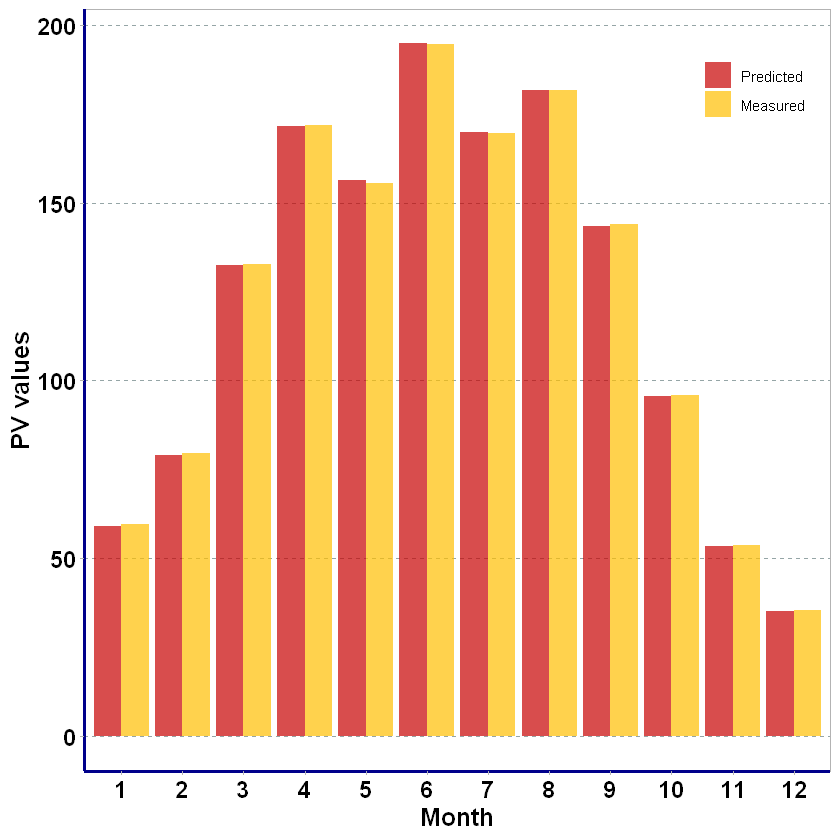

In [53]:
Final_m_plt <- results_FN %>% 
  select(c(m, PV , predictions)) %>% 
  group_by(m)%>%
  summarise(mean_pv = mean(PV),mean_pre = mean(predictions))
  
Final_m_plt

dff_final <- Final_m_plt %>% 
  select(m, mean_pv, mean_pre) %>%
  #mutate(m = fct_reorder(m, .desc = TRUE)) %>% 
  pivot_longer(!m, names_to = "Metrics", values_to = "Values")

# Compare numeric variables with bar plots
ggplot(data = dff_final) +
  geom_bar(mapping = aes(x = m, y = Values, fill = factor(Metrics,labels=c("Predicted","Measured"))), alpha = 0.7, stat = "identity", position = position_dodge(width = 0.9)) +
  xlab('Month') +
  ylab('PV values') +
  scale_fill_paletteer_d("calecopal::kelp1") +
  theme(
    panel.grid = element_blank(),
    panel.grid.major.y = element_line(color = '#95a5a6',
                                      linetype = 'dashed',
                                      size = 0.5),
    axis.text.x = element_text(angle = 90),
    legend.title = element_blank()
    
  )+
  theme(legend.position = c(0.9, 0.9), legend.background = element_blank(),
      plot.title = element_text(color="black", size=15, face="bold.italic"),
      axis.title.x = element_text(color="black", size=15, face="bold"),
      axis.text.x = element_text(face="bold", color="black", size=14, angle = 0),
      axis.title.y = element_text(color="black", size=15, face="bold"),
      axis.text.y = element_text(face="bold", color="black", size=14),
      axis.line = element_line(colour = "darkblue", size = 1,
                               linetype = "solid"))

setwd("C:/Users/Daud/Google Drive/Phd Saarland/Paper by Dd/Phd_Themes/Res.2-Genration modeling (S-01.12.17)/Analysis of weather parameters/T1_RE_P2_Analysis_of_Solar_radiations-Saarbrucken_jan2018_files/New/")
#ggsave("./Pre.png",Final_m_plt)
ggsave(filename = "mpred.png", width=10, height=5)
#plt.plot